# Data Cleaning and Exploration

## Data Cleaning

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# nltk packages
import nltk
nltk.download('stopwords', quiet=True)
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.collocations import *
from nltk import FreqDist, word_tokenize

# WordCloud
from wordcloud import WordCloud

# TextBlob
from textblob import TextBlob

In [2]:
# load dataset 
df = pd.read_csv('./data/tweet_product_company.csv', encoding="ISO-8859-1")
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
# info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


The dataframe contains 3 columns: tweet_text, emotion_in_tweet_is_directed_at, and is_there_an_emotion_directed_at_a-brand_or_product. I'm definitely going to change the column names to something more concise. There are nulls in the second column and there is one null in the tweet_text column. I'll deal with these soon.

#### Changing column names

In [4]:
# creating new column names
new_names = ['tweet_text', 'directed_at', 'sentiment']

# replacing column names
df.columns = new_names
df.columns

Index(['tweet_text', 'directed_at', 'sentiment'], dtype='object')

#### Value Counts

In [5]:
df.directed_at.value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: directed_at, dtype: int64

In [6]:
df.isnull().sum()

tweet_text        1
directed_at    5802
sentiment         0
dtype: int64

Majority of the rows in 'directed_at' are null. Besides null the most are directed at iPad and Apple

In [7]:
# value counts for sentiment
df.sentiment.value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: sentiment, dtype: int64

In [8]:
# value counts for sentiment
df.sentiment.value_counts(normalize=True)

No emotion toward brand or product    0.592654
Positive emotion                      0.327505
Negative emotion                      0.062686
I can't tell                          0.017156
Name: sentiment, dtype: float64

Majority of the tweets are neutral followed by positive sentiment. There is a very small amount of negative tweets which can be a problem once I create my classification model. 'I can't tell' values are interesting I'll look into those tweets further and possibly use TextBlob to add a sentiment to them.

#### Null Values

In [9]:
df.isnull().sum()

tweet_text        1
directed_at    5802
sentiment         0
dtype: int64

In [10]:
# null value for tweet
df.loc[df['tweet_text'].isnull()]

,tweet_text,directed_at,sentiment
6,NaN,NaN,No emotion toward brand or product


I'll drop this row because there is only one.

In [11]:
# drop null value from tweet_text
df.dropna(subset=['tweet_text'], inplace=True)

In [12]:
# fill null with 'Unknown' for directed_at
df.directed_at.fillna(value='Unknown', inplace=True)

In [13]:
df.isnull().sum()

tweet_text     0
directed_at    0
sentiment      0
dtype: int64

#### Checking for Duplicate Values

In [14]:
# duplicate rows
df.duplicated().sum()

22

In [15]:
# inspecting duplicate rows
df.loc[df.duplicated(keep=False)]

,tweet_text,directed_at,sentiment
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
17,I just noticed DST is coming this weekend. How...,iPhone,Negative emotion
20,Need to buy an iPad2 while I'm in Austin at #s...,iPad,Positive emotion
21,"Oh. My. God. The #SXSW app for iPad is pure, u...",iPad or iPhone App,Positive emotion
24,Really enjoying the changes in Gowalla 3.0 for...,Android App,Positive emotion
466,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
468,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
774,Google to Launch Major New Social Network Call...,Unknown,No emotion toward brand or product
776,Google to Launch Major New Social Network Call...,Unknown,No emotion toward brand or product


In [16]:
df.iloc[6297]['tweet_text']

'RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw'

In [17]:
# print out the tweets to see them
for tweet in df.loc[df.duplicated(keep=False)]['tweet_text']:
    print(tweet)

#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan
Counting down the days to #sxsw plus strong Canadian dollar means stock up on Apple gear
I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning? #SXSW #iPhone
Need to buy an iPad2 while I'm in Austin at #sxsw. Not sure if I'll need to Q up at an Austin Apple store?
Oh. My. God. The #SXSW app for iPad is pure, unadulterated awesome. It's easier to browse events on iPad than on the website!!!
Really enjoying the changes in Gowalla 3.0 for Android! Looking forward to seeing what else they &amp; Foursquare have up their sleeves at #SXSW
Before It Even Begins, Apple Wins #SXSW {link}
Before It Even Begins, Apple Wins #SXSW {link}
Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw
Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sx

In [18]:
# drop duplicates
df.drop_duplicates(inplace=True)

#### Mapping Columns

In [19]:
df.head()

,tweet_text,directed_at,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9070 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_text   9070 non-null   object
 1   directed_at  9070 non-null   object
 2   sentiment    9070 non-null   object
dtypes: object(3)
memory usage: 283.4+ KB


In [21]:
df.directed_at.value_counts()

Unknown                            5788
iPad                                945
Apple                               659
iPad or iPhone App                  469
Google                              428
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: directed_at, dtype: int64

In [22]:
# add a new column 'company' based on directed_at
company_dict = {
    'Unknown': "Unknown",
    'iPad': "Apple",
    'Apple': "Apple",
    'iPad or iPhone App': "Apple",
    'Google': "Google",
    'iPhone': "Apple",
    'Other Google product or service': "Google",
    'Android App': "Google",
    'Android': "Google",
    'Other Apple product or service': "Apple"
}

# create 'company' column
df['company'] = df['directed_at'].map(company_dict)

In [23]:
df.head()

,tweet_text,directed_at,sentiment,company
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Google


In [24]:
df.company.value_counts(normalize=True)

Unknown    0.638148
Apple      0.265050
Google     0.096803
Name: company, dtype: float64

#### Mapping sentiment column

In [25]:
df.sentiment.value_counts(normalize=True)

No emotion toward brand or product    0.592613
Positive emotion                      0.327453
Negative emotion                      0.062734
I can't tell                          0.017200
Name: sentiment, dtype: float64

In [26]:
# creating sentiment dictionary
sentiment_dict = {
    'No emotion toward brand or product': "neutral",
    'Positive emotion': "positive",
    'Negative emotion': 'negative',
    "I can't tell": 'unknown'
}

# creating 'target' column
df['target'] = df['sentiment'].map(sentiment_dict)

In [27]:
df.head()

,tweet_text,directed_at,sentiment,company,target
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Apple,negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Apple,positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Apple,positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple,negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Google,positive


In [28]:
df.target.value_counts(normalize=True)

neutral     0.592613
positive    0.327453
negative    0.062734
unknown     0.017200
Name: target, dtype: float64

#### Create new column with cleaned tweet

The tweets contain hashtags and mentions and I want to remove them so I can do EDA. The mentions won't play much significance in frequency distributions and the #swsw won't have much significance because every tweet contains it. For these reasons I am going to get rid of the hashtags and mentions in each tweet.

In [29]:
# function to preprocess tweets
def clean_hash_mentions(tweet):
    # pattern to remove hashtags and mentions
    hashtag_mention_pattern = '([@#][\w_-]+)'
    
    # remove hashtags and mentions
    tweet_clean = re.sub(hashtag_mention_pattern, '', tweet)
    
    # lower case
    tweet_clean = tweet_clean.lower()
    
    # tokenize tweet
    pattern = "([a-zA-Z0-9]+(?:'[a-z]+)?)"
    tweet_clean = nltk.regexp_tokenize(tweet_clean, pattern)
    
    # join tweet back together
    tweet_clean = ' '.join(tweet_clean)

    return tweet_clean

In [30]:
# create new column clean_tweet
df['clean_tweet'] = df['tweet_text'].map(clean_hash_mentions)

In [31]:
df.head()

,tweet_text,directed_at,sentiment,company,target,clean_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Apple,negative,i have a 3g iphone after 3 hrs tweeting at it ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Apple,positive,know about awesome ipad iphone app that you'll...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Apple,positive,can not wait for 2 also they should sale them ...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple,negative,i hope this year's festival isn't as crashy as...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Google,positive,great stuff on fri marissa mayer google tim o'...


#### Create new column with hashtags from tweets

In [32]:
# capture all the hashtags in the tweet
def hashtags(tweet):
    # pattern to remove hashtags and mentions
    hashtag_pattern = '([#][\w_-]+)'
    
    # remove hashtags and mentions
    tweet_clean = re.findall(hashtag_pattern, tweet)
    
    # join tweet back together
    tweet_clean = ' '.join(tweet_clean)
    
    # lower case
    tweet_clean = tweet_clean.lower()

    return tweet_clean

In [33]:
# creating hashtags column
df['hashtags'] = df['tweet_text'].map(hashtags)

In [34]:
df.head()

,tweet_text,directed_at,sentiment,company,target,clean_tweet,hashtags
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Apple,negative,i have a 3g iphone after 3 hrs tweeting at it ...,#rise_austin #sxsw
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Apple,positive,know about awesome ipad iphone app that you'll...,#sxsw
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Apple,positive,can not wait for 2 also they should sale them ...,#ipad #sxsw
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple,negative,i hope this year's festival isn't as crashy as...,#sxsw
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Google,positive,great stuff on fri marissa mayer google tim o'...,#sxsw


#### Create new column with mentions from tweets

In [35]:
# capture all the mentions in the tweet
def mentions(tweet):
    # pattern to remove hashtags and mentions
    mention_pattern = '([@][\w_-]+)'
    
    # remove hashtags and mentions
    tweet_clean = re.findall(mention_pattern, tweet)
    
    # join tweet back together
    tweet_clean = ' '.join(tweet_clean)
    
    # lower case
    tweet_clean = tweet_clean.lower()

    return tweet_clean

In [36]:
# creating mentions column
df['mentions'] = df['tweet_text'].map(mentions)

In [37]:
df.head()

,tweet_text,directed_at,sentiment,company,target,clean_tweet,hashtags,mentions
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Apple,negative,i have a 3g iphone after 3 hrs tweeting at it ...,#rise_austin #sxsw,@wesley83
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Apple,positive,know about awesome ipad iphone app that you'll...,#sxsw,@jessedee @fludapp
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Apple,positive,can not wait for 2 also they should sale them ...,#ipad #sxsw,@swonderlin
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple,negative,i hope this year's festival isn't as crashy as...,#sxsw,@sxsw
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Google,positive,great stuff on fri marissa mayer google tim o'...,#sxsw,@sxtxstate


#### Looking for duplicates again

I removed hashtags and mentions from the tweets. I want to look at the clean_tweets columns to see if there are duplicates because it is possible there are now duplicates of these tweets. The tweets may share the same content and have a differecnt mention in them. So essentially the tweets are the same so I may want to remove the duplicates.

In [38]:
df['clean_tweet'].duplicated().sum()

394

There are 389 duplicate clean tweets. Let's take a look at them.

In [39]:
# looking at duplicate clean_tweet column
df.loc[df['clean_tweet'].duplicated(keep=False)].sort_values('clean_tweet')

,tweet_text,directed_at,sentiment,company,target,clean_tweet,hashtags,mentions
7346,#sxsw #japan #sendai #prayforjapan #beforetwit...,Unknown,No emotion toward brand or product,Unknown,neutral,,#sxsw #japan #sendai #prayforjapan #beforetwit...,
1561,@mention @mention $ #tweethouse #ipad #sxsw #d...,Unknown,No emotion toward brand or product,Unknown,neutral,,#tweethouse #ipad #sxsw #dotco,@mention @mention
4953,40% of google maps use is mobile #sxsw,Unknown,No emotion toward brand or product,Unknown,neutral,40 of google maps use is mobile,#sxsw,
4954,40% of Google maps use is mobile #sxsw,Unknown,No emotion toward brand or product,Unknown,neutral,40 of google maps use is mobile,#sxsw,
2252,Apple grabbed the tablet mindshare at #sxsw bu...,Apple,Positive emotion,Apple,positive,apple grabbed the tablet mindshare at but rim ...,#sxsw #foodspotting #mnbuzz,
...,...,...,...,...,...,...,...,...
3811,Win free ipad 2 from webdoc.com #sxsw RT,Unknown,No emotion toward brand or product,Unknown,neutral,win free ipad 2 from webdoc com rt,#sxsw,
3810,Win free IPad 2 from webdoc.com #sxsw RT,Unknown,No emotion toward brand or product,Unknown,neutral,win free ipad 2 from webdoc com rt,#sxsw,
3809,win free iPad 2 from webdoc.com #sxsw RT,Unknown,No emotion toward brand or product,Unknown,neutral,win free ipad 2 from webdoc com rt,#sxsw,
4199,Yes! Gowalla wins best Andoid app at the Team ...,Android App,Positive emotion,Google,positive,yes gowalla wins best andoid app at the team a...,#sxsw,


I can see the duplicated tweets but now there is a bigger problem.

There are duplicated tweets that each have a different sentiment/target. That does not make sense how the same tweet can have multiple sentiments. I'm going to drop all the duplicates that have multiple sentiments and keep only of the duplicate rows that only have 1 sentiment to them. 

For the duplicates with multiple sentiments, I can't keep at least one of them because I don't know which of the sentiments is correct. For this reason, I have to treat these values as invalid and get rid of them all.

In [40]:
# looking at duplicate clean_tweet column
df.loc[df['clean_tweet'].duplicated(keep=False)].sort_values('clean_tweet')

,tweet_text,directed_at,sentiment,company,target,clean_tweet,hashtags,mentions
7346,#sxsw #japan #sendai #prayforjapan #beforetwit...,Unknown,No emotion toward brand or product,Unknown,neutral,,#sxsw #japan #sendai #prayforjapan #beforetwit...,
1561,@mention @mention $ #tweethouse #ipad #sxsw #d...,Unknown,No emotion toward brand or product,Unknown,neutral,,#tweethouse #ipad #sxsw #dotco,@mention @mention
4953,40% of google maps use is mobile #sxsw,Unknown,No emotion toward brand or product,Unknown,neutral,40 of google maps use is mobile,#sxsw,
4954,40% of Google maps use is mobile #sxsw,Unknown,No emotion toward brand or product,Unknown,neutral,40 of google maps use is mobile,#sxsw,
2252,Apple grabbed the tablet mindshare at #sxsw bu...,Apple,Positive emotion,Apple,positive,apple grabbed the tablet mindshare at but rim ...,#sxsw #foodspotting #mnbuzz,
...,...,...,...,...,...,...,...,...
3811,Win free ipad 2 from webdoc.com #sxsw RT,Unknown,No emotion toward brand or product,Unknown,neutral,win free ipad 2 from webdoc com rt,#sxsw,
3810,Win free IPad 2 from webdoc.com #sxsw RT,Unknown,No emotion toward brand or product,Unknown,neutral,win free ipad 2 from webdoc com rt,#sxsw,
3809,win free iPad 2 from webdoc.com #sxsw RT,Unknown,No emotion toward brand or product,Unknown,neutral,win free ipad 2 from webdoc com rt,#sxsw,
4199,Yes! Gowalla wins best Andoid app at the Team ...,Android App,Positive emotion,Google,positive,yes gowalla wins best andoid app at the team a...,#sxsw,


In [41]:
# group by clean_tweets and target and count the occurence
# here I can see the tweets with more than one target
df.loc[df['clean_tweet'].duplicated(keep=False)].sort_values('clean_tweet')\
.groupby(['clean_tweet', 'target']).count().reset_index()

,clean_tweet,target,tweet_text,directed_at,sentiment,company,hashtags,mentions
0,,neutral,2,2,2,2,2,2
1,40 of google maps use is mobile,neutral,2,2,2,2,2,2
2,apple grabbed the tablet mindshare at but rim ...,neutral,1,1,1,1,1,1
3,apple grabbed the tablet mindshare at but rim ...,positive,1,1,1,1,1,1
4,apple has two austin stores but until this wee...,neutral,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
329,will google reveal a new social network called...,neutral,2,2,2,2,2,2
330,will google reveal a new social network called...,neutral,2,2,2,2,2,2
331,win free ipad 2 from webdoc com rt,neutral,4,4,4,4,4,4
332,win free ipad 2 from webdoc com rt,positive,2,2,2,2,2,2


In [42]:
# group again by clean_tweet and count the sentiment
# anything more than 1 indicates more than 1 sentiment
df.loc[df['clean_tweet'].duplicated(keep=False)].sort_values('clean_tweet')\
.groupby(['clean_tweet', 'target']).count().reset_index().groupby('clean_tweet')\
.count().reset_index()

# print value counts
print(df.loc[df['clean_tweet'].duplicated(keep=False)].sort_values('clean_tweet')\
.groupby(['clean_tweet', 'target']).count().reset_index().groupby('clean_tweet')\
.count().reset_index().target.value_counts())

1    196
2     69
Name: target, dtype: int64


There are 64 tweets that are duplicated and have different sentiments. Now I have to get a list of those tweets.

In [43]:
# saving above table as a dataframe
dup_tweets = df.loc[df['clean_tweet'].duplicated(keep=False)].sort_values('clean_tweet')\
.groupby(['clean_tweet', 'target']).count().reset_index().groupby('clean_tweet')\
.count().reset_index()

tweets_to_drop = list(dup_tweets.loc[dup_tweets['target'] > 1]['clean_tweet'])

In [44]:
# filter out tweets_to_drop from df
df = df.loc[~df['clean_tweet'].isin(tweets_to_drop)]

Now I have to drop any remaining duplicated from the clean_tweet column. These tweets should be duplicates and have only one sentiment.

In [45]:
df.clean_tweet.duplicated().sum()

225

In [46]:
# drop remaining duplicate values from df
df.drop_duplicates(subset=['clean_tweet'], inplace=True)

In [47]:
df.head()

,tweet_text,directed_at,sentiment,company,target,clean_tweet,hashtags,mentions
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Apple,negative,i have a 3g iphone after 3 hrs tweeting at it ...,#rise_austin #sxsw,@wesley83
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Apple,positive,know about awesome ipad iphone app that you'll...,#sxsw,@jessedee @fludapp
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Apple,positive,can not wait for 2 also they should sale them ...,#ipad #sxsw,@swonderlin
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple,negative,i hope this year's festival isn't as crashy as...,#sxsw,@sxsw
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Google,positive,great stuff on fri marissa mayer google tim o'...,#sxsw,@sxtxstate


## Exploratory Data Analysis

### Distribution of Tweets

<AxesSubplot:xlabel='target', ylabel='tweet_text'>

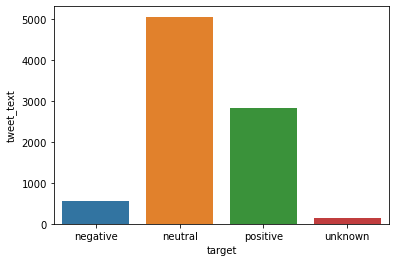

In [48]:
# bar plot showing the number of targets
sns.barplot(data=df.groupby(['target']).count()['tweet_text'].reset_index(),
            x='target',
            y='tweet_text')

In [49]:
df.groupby(['target', 'company']).count()['tweet_text'].reset_index()

,target,company,tweet_text
0,negative,Apple,378
1,negative,Google,128
2,negative,Unknown,49
3,neutral,Apple,63
4,neutral,Google,23
5,neutral,Unknown,4974
6,positive,Apple,1866
7,positive,Google,683
8,positive,Unknown,292
9,unknown,Apple,7


<AxesSubplot:xlabel='target', ylabel='tweet_text'>

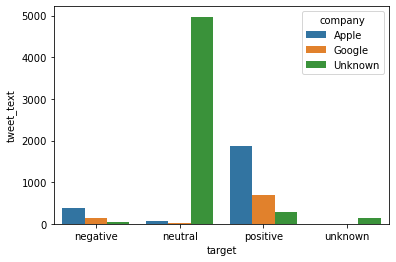

In [50]:
sns.barplot(data=df.groupby(['target', 'company']).count()['tweet_text'].reset_index(),
            x='target',
            y='tweet_text',
            hue='company')

Unknown sentiment makes up only a small amount of the total tweets and of those tweets the vast majority have an unknown direction. I will drop these values.

In [51]:
# filter target column
filter_s = df['target'] != 'unknown'

# filter dataframe
df = df.loc[filter_s]

In [52]:
df.head()

,tweet_text,directed_at,sentiment,company,target,clean_tweet,hashtags,mentions
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Apple,negative,i have a 3g iphone after 3 hrs tweeting at it ...,#rise_austin #sxsw,@wesley83
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Apple,positive,know about awesome ipad iphone app that you'll...,#sxsw,@jessedee @fludapp
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Apple,positive,can not wait for 2 also they should sale them ...,#ipad #sxsw,@swonderlin
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple,negative,i hope this year's festival isn't as crashy as...,#sxsw,@sxsw
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Google,positive,great stuff on fri marissa mayer google tim o'...,#sxsw,@sxtxstate


<AxesSubplot:xlabel='target', ylabel='tweet_text'>

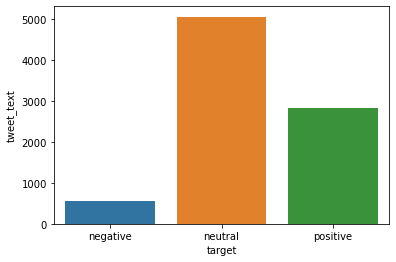

In [53]:
# bar plot to show number of tweets by target
sns.barplot(data=df.groupby(['target']).count()['tweet_text'].reset_index(),
            x='target',
            y='tweet_text')

Here is the distribution of the classes. Neutral has the most occurences by far followed by positive and negative.

<AxesSubplot:xlabel='target', ylabel='tweet_text'>

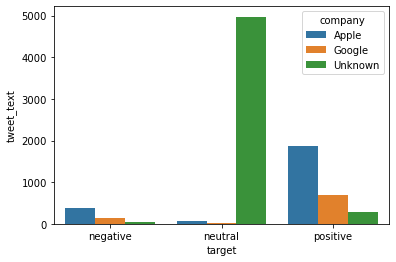

In [54]:
# bar plot to show number of tweets by target and company
sns.barplot(data=df.groupby(['target', 'company']).count()['tweet_text'].reset_index(),
            x='target',
            y='tweet_text',
            hue='company')

Unknown has the most neutral tweets by far. Apple has the most positive and negative tweets written about them. I'm curious as to what people are talking about in those tweets.

In [55]:
df.groupby(['directed_at', 'target']).count()['tweet_text'].reset_index()

,directed_at,target,tweet_text
0,Android,negative,7
1,Android,neutral,1
2,Android,positive,66
3,Android App,negative,8
4,Android App,neutral,1
5,Android App,positive,66
6,Apple,negative,94
7,Apple,neutral,20
8,Apple,positive,500
9,Google,negative,66


<AxesSubplot:xlabel='target', ylabel='tweet_text'>

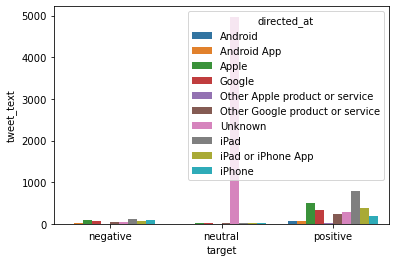

In [56]:
# bar plot to show number of tweets by target and company
sns.barplot(data=df.groupby(['target', 'directed_at']).count()['tweet_text'].reset_index(),
            x='target',
            y='tweet_text',
            hue='directed_at')

This graph is hard to read due to the Unknowns. I'll filter these out to create a new graph.

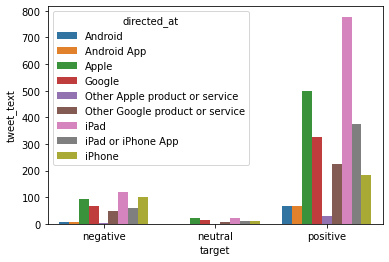

In [57]:
# create variable for the table
data_table = df.groupby(['directed_at', 'target']).count()['tweet_text'].reset_index()

# filter out unknown values
data_table.loc[data_table['directed_at'] != 'Unknown']

# bar plot to show number of tweets by target and company
sns.barplot(data=data_table.loc[data_table['directed_at'] != 'Unknown'],
            x='target',
            y='tweet_text',
            hue='directed_at');

* Most of the positive tweets are about the iPad and Apple followed by iPad or iPhone App and Google.
* Most of the negative tweets about about iPad and iPhone followed by Apple and Google.

### Frequency Distributions

I'll create frequency distributions to see which words and phrases are most associated with each of the classes. I'll also take a look at which words and phrases are associated with the companies and their sentiments.

#### Helper Functions

These helper function will help with creating frequency distributions, normalized distribution functions, and n grams

In [58]:
# function to convert series to clean tokenized list
def clean_tokenize(series):
    # convert rows of tweets to one string
    allwords = ' '.join(series)

    # tokenize allwords
    allwords = allwords.split(' ')
    
    # remove stop words
    stopwords_list = stopwords.words('english')
    
    # add to stop words
    stopwords_list += ['link', 'rt']

    allwords_stopped = [word for word in allwords if word not in stopwords_list]
    
    return allwords_stopped

# create a frequency distribution and output n most common
def n_most_common(token_list, n=None):
    freq_dist = FreqDist(token_list)
    
    if n == None:
        return freq_dist
    else:
        return freq_dist.most_common(n)

# normalized distribution function
def norm_dist(freq_dist):
    # normalized distribution function
    total_word_count = sum(freq_dist.values())
    top_50_words = freq_dist.most_common(50)

    # prints headers for the output
    print(f'{"Word":10} Normalized Frequency')

    # for loop to print normalized distribution function
    for word in top_50_words:
        normalized_distribution = word[1] / total_word_count
        print(f"{word[0]:10} {normalized_distribution:^20.4}")
        
# bigram function
def bigram(token_list, pmi=False, apply_filter=5):
    # bigram measures
    bigram_measures = nltk.collocations.BigramAssocMeasures
    
    if pmi:
        # mutual information score (pmi)
        pmi_finder = BigramCollocationFinder.from_words(token_list)
        pmi_finder.apply_freq_filter(apply_filter)
        pmi_scored = pmi_finder.score_ngrams(bigram_measures.pmi)  
        
        return pmi_scored
    else:
        # creating bigrams
        finder = BigramCollocationFinder.from_words(token_list)
        scored = finder.score_ngrams(bigram_measures.raw_freq)
        
        return scored
    
# trigram function
def trigram(token_list, pmi=False, apply_filter=5):
    # trigram measures
    trigram_measures = nltk.collocations.TrigramAssocMeasures
    
    if pmi:
        # mutual information score (pmi)
        pmi_finder = TrigramCollocationFinder.from_words(token_list)
        pmi_finder.apply_freq_filter(apply_filter)
        pmi_scored = pmi_finder.score_ngrams(trigram_measures.pmi)  
        
        return pmi_scored
    else:
        # creating trigrams
        finder = TrigramCollocationFinder.from_words(token_list)
        scored = finder.score_ngrams(trigram_measures.raw_freq)
        
        return scored

### Frequency Distributions Based on Sentiment

#### Positive Tweets

In [59]:
# positive filter
pos_filter = df['target'] == 'positive'

# positive tweets
positive_tweets = df.loc[pos_filter]

In [60]:
positive_tweets.head()

,tweet_text,directed_at,sentiment,company,target,clean_tweet,hashtags,mentions
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Apple,positive,know about awesome ipad iphone app that you'll...,#sxsw,@jessedee @fludapp
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Apple,positive,can not wait for 2 also they should sale them ...,#ipad #sxsw,@swonderlin
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Google,positive,great stuff on fri marissa mayer google tim o'...,#sxsw,@sxtxstate
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion,Google,positive,is just starting is around the corner and is o...,#sxsw #ctia #googleio #android,
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion,Apple,positive,beautifully smart and simple idea rt wrote abo...,#hollergram #sxsw,@madebymany @thenextweb


In [61]:
# create string of all the clean tweets
positive_tweets_token = clean_tokenize(positive_tweets['clean_tweet'])

In [62]:
# create frequency distribution of positive tweets
pos_freq_dist = n_most_common(positive_tweets_token)

# 50 most common words
pos_freq_dist.most_common(50)

[('ipad', 897),
 ('apple', 677),
 ('google', 580),
 ('store', 524),
 ('iphone', 454),
 ('2', 453),
 ('quot', 430),
 ('app', 364),
 ('new', 324),
 ('austin', 236),
 ('pop', 207),
 ('amp', 199),
 ('android', 158),
 ('get', 155),
 ('launch', 142),
 ('great', 135),
 ('line', 132),
 ('sxsw', 131),
 ('party', 131),
 ('time', 123),
 ('via', 121),
 ('like', 115),
 ("i'm", 114),
 ('free', 113),
 ('one', 112),
 ('cool', 109),
 ('day', 109),
 ('social', 108),
 ('w', 101),
 ('maps', 100),
 ('today', 98),
 ('circles', 94),
 ('awesome', 92),
 ('good', 91),
 ('love', 88),
 ('go', 85),
 ('check', 84),
 ('mobile', 83),
 ('opening', 82),
 ('temporary', 82),
 ('downtown', 80),
 ('got', 79),
 ('people', 77),
 ('ipad2', 77),
 ('network', 76),
 ('apps', 74),
 ('see', 74),
 ('popup', 73),
 ('thanks', 67),
 ('around', 65)]

In [63]:
# normalized distribution function positive tweets
norm_dist(pos_freq_dist) # 50 most common words

Word       Normalized Frequency
ipad             0.03287       
apple            0.02481       
google           0.02125       
store             0.0192       
iphone           0.01664       
2                 0.0166       
quot             0.01576       
app              0.01334       
new              0.01187       
austin           0.008648      
pop              0.007585      
amp              0.007292      
android          0.005789      
get              0.00568       
launch           0.005203      
great            0.004947      
line             0.004837      
sxsw              0.0048       
party             0.0048       
time             0.004507      
via              0.004434      
like             0.004214      
i'm              0.004177      
free             0.004141      
one              0.004104      
cool             0.003994      
day              0.003994      
social           0.003957      
w                0.003701      
maps             0.003664      
today   

In [64]:
# most common bigrams
bigram(positive_tweets_token)

[(('ipad', '2'), 0.013227804037961232),
 (('apple', 'store'), 0.006962002125242754),
 (('pop', 'store'), 0.0046901909054266975),
 (('iphone', 'app'), 0.0037008537613132534),
 (('google', 'maps'), 0.0027481587336484555),
 (('social', 'network'), 0.0026382323843025172),
 (('apple', 'pop'), 0.002381737569161995),
 (('ipad', 'app'), 0.002381737569161995),
 (('new', 'social'), 0.002381737569161995),
 (('temporary', 'store'), 0.0023450954527133487),
 (('downtown', 'austin'), 0.0023084533362647025),
 (('store', 'downtown'), 0.0023084533362647025),
 (('apple', 'opening'), 0.0021985269869187643),
 (('google', 'launch'), 0.0019420321717782418),
 (('new', 'ipad'), 0.0018687479388809498),
 (('marissa', 'mayer'), 0.0017954637059836576),
 (('2', 'launch'), 0.0017221794730863656),
 (('store', 'austin'), 0.0017221794730863656),
 (('called', 'circles'), 0.0016855373566377193),
 (('google', 'party'), 0.0016488952401890733),
 (('network', 'called'), 0.0016488952401890733),
 (('quot', 'apple'), 0.00161225

In [65]:
# most common bigrams with pmi
bigram(positive_tweets_token, pmi=True)

[(('ice', 'cream'), 12.414209543642368),
 (('etch', 'sketch'), 12.151175137808572),
 (('league', 'extraordinary'), 12.151175137808572),
 (('lustre', 'pearl'), 12.151175137808572),
 (('exhibit', 'hall'), 11.928782716472124),
 (('awesomely', 'rad'), 11.566212637087418),
 (('haha', 'awesomely'), 11.566212637087418),
 (('south', 'southwest'), 11.566212637087418),
 (('mark', 'belinsky'), 11.543492560587332),
 (('maggie', "mae's"), 11.27670601989243),
 (('city', 'end'), 11.058065733417092),
 (('150', 'million'), 10.98125013636626),
 (('macbook', 'pro'), 10.928782716472124),
 (('fam', 'showing'), 10.736137638529728),
 (('physical', 'worlds'), 10.736137638529728),
 (('holler', 'gram'), 10.648674797279389),
 (('includes', 'uberguide'), 10.648674797279389),
 (('64gig', 'wifi'), 10.566212637087418),
 (('choice', 'awards'), 10.566212637087418),
 (('customer', 'service'), 10.566212637087414),
 (('convention', 'center'), 10.529686761062301),
 (('goes', 'sale'), 10.414209543642365),
 (('bit', 'ly'), 

In [66]:
# most common trigrams
trigram(positive_tweets_token, pmi=False)

[(('new', 'social', 'network'), 0.0022718112198160567),
 (('store', 'downtown', 'austin'), 0.002088600637572826),
 (('apple', 'pop', 'store'), 0.0018321058224323038),
 (('ipad', '2', 'launch'), 0.0017221794730863656),
 (('network', 'called', 'circles'), 0.0016488952401890733),
 (('social', 'network', 'called'), 0.0016488952401890733),
 (('launch', 'major', 'new'), 0.001575611007291781),
 (('major', 'new', 'social'), 0.001575611007291781),
 (('google', 'launch', 'major'), 0.0014290425414971969),
 (('opening', 'temporary', 'store'), 0.0013191161921512586),
 (('temporary', 'store', 'downtown'), 0.0011725477263566744),
 (('apple', 'opening', 'temporary'), 0.0011359056099080284),
 (('circles', 'possibly', 'today'), 0.0011359056099080284),
 (('called', 'circles', 'possibly'), 0.0010992634934593821),
 (('quot', 'apple', 'comes'), 0.0010259792605620901),
 (('begins', 'apple', 'wins'), 0.0009526950276647979),
 (('even', 'begins', 'apple'), 0.0009526950276647979),
 (("one's", 'ever', 'heard'), 0

In [67]:
# most common trigrams with pmi
trigram(positive_tweets_token, pmi=True)

[(('haha', 'awesomely', 'rad'), 23.132425274174835),
 (('mark', 'belinsky', 'panel'), 21.070176833488112),
 (('http', 'bit', 'ly'), 20.395459680008628),
 (('includes', 'uberguide', 'sponsored'), 20.192167357866726),
 (('schools', 'marketing', 'experts'), 20.17271499520055),
 (('brain', 'search', 'x'), 20.0799578542807),
 (('left', 'brain', 'search'), 18.964480636860763),
 (('choice', 'awards', 'thanks'), 18.946754467964386),
 (('technology', "one's", 'ever'), 18.856300868900593),
 (('w', 'fam', 'showing'), 18.814063794307664),
 (('150', 'million', 'mobile'), 18.664276438436424),
 (("one's", 'ever', 'heard'), 18.640572177845158),
 (('live', 'video', 'streaming'), 18.628179808186836),
 (('route', 'around', 'traffic'), 18.049028027748818),
 (('shop', 'core', 'action'), 18.003269484624536),
 (('android', 'choice', 'awards'), 17.998569527440043),
 (('wins', 'best', 'andoid'), 17.78402496792628),
 (('web', 'site', 'coming'), 17.763967315585028),
 (('cool', 'technology', "one's"), 17.57996964

#### Negative Tweets

In [68]:
# negative filter
neg_filter = df['target'] == 'negative'

# negative tweets
negative_tweets = df.loc[neg_filter]

In [69]:
negative_tweets.head()

,tweet_text,directed_at,sentiment,company,target,clean_tweet,hashtags,mentions
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Apple,negative,i have a 3g iphone after 3 hrs tweeting at it ...,#rise_austin #sxsw,@wesley83
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple,negative,i hope this year's festival isn't as crashy as...,#sxsw,@sxsw
17,I just noticed DST is coming this weekend. How...,iPhone,Negative emotion,Apple,negative,i just noticed dst is coming this weekend how ...,#sxsw #iphone,
64,Again? RT @mention Line at the Apple store is ...,Unknown,Negative emotion,Unknown,negative,again rt line at the apple store is insane,#sxsw,@mention
67,attending @mention iPad design headaches #sxsw...,iPad,Negative emotion,Apple,negative,attending ipad design headaches link,#sxsw,@mention


In [70]:
# create string of all the clean tweets
negative_tweets_token = clean_tokenize(negative_tweets['clean_tweet'])

In [71]:
negative_tweets_token

['3g',
 'iphone',
 '3',
 'hrs',
 'tweeting',
 'dead',
 'need',
 'upgrade',
 'plugin',
 'stations',
 'hope',
 "year's",
 'festival',
 'crashy',
 "year's",
 'iphone',
 'app',
 'noticed',
 'dst',
 'coming',
 'weekend',
 'many',
 'iphone',
 'users',
 'hour',
 'late',
 'sxsw',
 'come',
 'sunday',
 'morning',
 'line',
 'apple',
 'store',
 'insane',
 'attending',
 'ipad',
 'design',
 'headaches',
 'boooo',
 'flipboard',
 'developing',
 'iphone',
 'version',
 'android',
 'says',
 'provide',
 'iphone',
 'chargers',
 "i've",
 'changed',
 'mind',
 'going',
 'next',
 'year',
 'know',
 'quot',
 'dataviz',
 'quot',
 'translates',
 'quot',
 'satanic',
 'quot',
 'iphone',
 "i'm",
 'sayin',
 'seriously',
 'testing',
 'mobile',
 'apps',
 'constant',
 'ipad',
 'crashes',
 'causing',
 'lost',
 'schedules',
 'sync',
 'wp7',
 'ipad2',
 'conflagration',
 'doofusness',
 'spent',
 '1',
 '000',
 'come',
 'sxsw',
 'already',
 'used',
 'ipad',
 '1',
 'wait',
 'couple',
 'city',
 'blocks',
 "i'm",
 '2',
 'ipad',
 

In [72]:
# create frequency distribution of negative tweets
neg_freq_dist = n_most_common(negative_tweets_token)

# 50 most common words
neg_freq_dist.most_common(50)

[('ipad', 163),
 ('quot', 163),
 ('iphone', 141),
 ('google', 132),
 ('apple', 100),
 ('2', 62),
 ('app', 59),
 ('store', 46),
 ('new', 42),
 ('like', 38),
 ('design', 29),
 ('people', 29),
 ('social', 27),
 ('apps', 25),
 ('austin', 25),
 ('get', 24),
 ('circles', 23),
 ('amp', 22),
 ('one', 22),
 ('launch', 21),
 ('today', 21),
 ('need', 20),
 ('would', 19),
 ('line', 18),
 ('android', 18),
 ('time', 18),
 ('think', 18),
 ('headaches', 17),
 ('news', 17),
 ('pop', 17),
 ('long', 17),
 ('sxsw', 16),
 ('says', 16),
 ("i'm", 16),
 ('battery', 16),
 ('go', 16),
 ('day', 16),
 ('1', 15),
 ('network', 15),
 ('good', 15),
 ('much', 15),
 ('america', 15),
 ('users', 14),
 ('back', 14),
 ('major', 14),
 ('really', 14),
 ('via', 14),
 ('see', 14),
 ('fascist', 14),
 ('company', 14)]

In [73]:
# normalized distribution function negative tweets
norm_dist(neg_freq_dist) # 50 most common words

Word       Normalized Frequency
ipad             0.02924       
quot             0.02924       
iphone           0.02529       
google           0.02368       
apple            0.01794       
2                0.01112       
app              0.01058       
store            0.008251      
new              0.007534      
like             0.006816      
design           0.005202      
people           0.005202      
social           0.004843      
apps             0.004484      
austin           0.004484      
get              0.004305      
circles          0.004126      
amp              0.003946      
one              0.003946      
launch           0.003767      
today            0.003767      
need             0.003587      
would            0.003408      
line             0.003229      
android          0.003229      
time             0.003229      
think            0.003229      
headaches        0.003049      
news             0.003049      
pop              0.003049      
long    

In [74]:
# most common bigrams
bigram(negative_tweets_token)

[(('ipad', '2'), 0.008071748878923767),
 (('apple', 'store'), 0.004304932735426009),
 (('ipad', 'design'), 0.0034080717488789236),
 (('iphone', 'app'), 0.0034080717488789236),
 (('design', 'headaches'), 0.0030493273542600897),
 (('new', 'social'), 0.0026905829596412557),
 (('quot', 'quot'), 0.0026905829596412557),
 (('social', 'network'), 0.0025112107623318385),
 (('company', 'america'), 0.0023318385650224214),
 (('fascist', 'company'), 0.0021524663677130046),
 (('major', 'new'), 0.0021524663677130046),
 (('google', 'launch'), 0.0019730941704035874),
 (('launch', 'major'), 0.0017937219730941704),
 (('network', 'called'), 0.0017937219730941704),
 (('quot', 'apple'), 0.0017937219730941704),
 (('called', 'circles'), 0.0016143497757847534),
 (('fades', 'fast'), 0.0016143497757847534),
 (('fast', 'among'), 0.0016143497757847534),
 (('google', 'circles'), 0.0016143497757847534),
 (('google', 'maps'), 0.0016143497757847534),
 (('iphone', 'battery'), 0.0016143497757847534),
 (('news', 'apps'),

In [75]:
# most common bigrams with pmi
bigram(negative_tweets_token, pmi=True)

[(('kara', 'swisher'), 9.44475608969503),
 (('marissa', 'mayer'), 9.122827994807668),
 (('among', 'digital'), 9.082186010310323),
 (('digital', 'delegates'), 9.082186010310323),
 (('fast', 'among'), 8.859793588973872),
 (('way', 'caring'), 8.744316371553937),
 (('fades', 'fast'), 8.707790495528823),
 (('caring', 'much'), 8.53786549408651),
 (('much', 'business'), 8.53786549408651),
 (('classiest', 'fascist'), 8.467476166195112),
 (('company', 'america'), 8.43095029017),
 (('fascist', 'company'), 8.415008746300977),
 (('network', 'called'), 8.274831088252718),
 (('elegant', 'fascist'), 8.151974340467183),
 (('lost', 'way'), 8.0662444664413),
 (('possibly', 'today'), 7.859793588973875),
 (('social', 'network'), 7.5903329139806495),
 (('design', 'headaches'), 7.586775094567457),
 (('launch', 'major'), 7.567011839746028),
 (('circles', 'possibly'), 7.506156634359173),
 (('called', 'circles'), 7.506156634359172),
 (('apps', 'fades'), 7.063934305754099),
 (('news', 'apps'), 6.883362060112276

In [76]:
# most common trigrams
trigram(negative_tweets_token, pmi=False)

[(('ipad', 'design', 'headaches'), 0.0028699551569506725),
 (('major', 'new', 'social'), 0.0021524663677130046),
 (('new', 'social', 'network'), 0.0021524663677130046),
 (('fascist', 'company', 'america'), 0.0019730941704035874),
 (('launch', 'major', 'new'), 0.0017937219730941704),
 (('social', 'network', 'called'), 0.0017937219730941704),
 (('fades', 'fast', 'among'), 0.0016143497757847534),
 (('google', 'launch', 'major'), 0.0016143497757847534),
 (('network', 'called', 'circles'), 0.0016143497757847534),
 (('classiest', 'fascist', 'company'), 0.0014349775784753362),
 (('company', 'america', 'quot'), 0.0014349775784753362),
 (('among', 'digital', 'delegates'), 0.0012556053811659193),
 (('fast', 'among', 'digital'), 0.0012556053811659193),
 (('ipad', 'news', 'apps'), 0.0012556053811659193),
 (('apps', 'fades', 'fast'), 0.0010762331838565023),
 (('called', 'circles', 'possibly'), 0.0010762331838565023),
 (('circles', 'possibly', 'today'), 0.0010762331838565023),
 (('news', 'apps', 'fa

In [77]:
# most common trigrams
trigram(negative_tweets_token, pmi=True)

[(('caring', 'much', 'business'), 18.66069348889418),
 (('among', 'digital', 'delegates'), 18.357017098563038),
 (('lost', 'way', 'caring'), 18.18907246124897),
 (('fades', 'fast', 'among'), 17.98262158378154),
 (('fast', 'among', 'digital'), 17.941979599284196),
 (('way', 'caring', 'much'), 17.282181865640446),
 (('classiest', 'fascist', 'company'), 17.10487733383254),
 (('fascist', 'company', 'america'), 16.82734335830363),
 (('called', 'circles', 'possibly'), 16.365950223333048),
 (('network', 'called', 'circles'), 16.044022128445683),
 (('social', 'network', 'called'), 15.964699675784274),
 (('apps', 'fades', 'fast'), 15.923727894727975),
 (('circles', 'possibly', 'today'), 15.558595301275444),
 (('news', 'apps', 'fades'), 15.42122755419879),
 (('launch', 'major', 'new'), 14.619450506662293),
 (('major', 'new', 'social'), 14.51991483311138),
 (('new', 'social', 'network'), 14.420379159560467),
 (('apple', 'elegant', 'fascist'), 13.952874240387487),
 (('quot', 'classiest', 'fascist'

#### Neutral Tweets

In [78]:
# neutral filter
neutral_filter = df['target'] == 'neutral'

# neutral tweets
neutral_tweets = df.loc[neutral_filter]

In [79]:
neutral_tweets.head()

,tweet_text,directed_at,sentiment,company,target,clean_tweet,hashtags,mentions
5,@teachntech00 New iPad Apps For #SpeechTherapy...,Unknown,No emotion toward brand or product,Unknown,neutral,new ipad apps for and communication are showca...,#speechtherapy #sxsw #iear #edchat #asd,@teachntech00
16,Holler Gram for iPad on the iTunes App Store -...,Unknown,No emotion toward brand or product,Unknown,neutral,holler gram for ipad on the itunes app store h...,#sxsw,@marc_is_ken
32,"Attn: All #SXSW frineds, @mention Register fo...",Unknown,No emotion toward brand or product,Unknown,neutral,attn all frineds register for and see cobra ir...,#sxsw #gdgtlive,@mention
33,Anyone at #sxsw want to sell their old iPad?,Unknown,No emotion toward brand or product,Unknown,neutral,anyone at want to sell their old ipad,#sxsw,
34,Anyone at #SXSW who bought the new iPad want ...,Unknown,No emotion toward brand or product,Unknown,neutral,anyone at who bought the new ipad want to sell...,#sxsw,


In [80]:
# create string of all the clean tweets
neutral_tweets_token = clean_tokenize(neutral_tweets['clean_tweet'])

In [81]:
neutral_tweets_token

['new',
 'ipad',
 'apps',
 'communication',
 'showcased',
 'conference',
 'http',
 'ht',
 'ly',
 '49n4m',
 'holler',
 'gram',
 'ipad',
 'itunes',
 'app',
 'store',
 'http',
 'co',
 'kfn3f5q',
 'via',
 'attn',
 'frineds',
 'register',
 'see',
 'cobra',
 'iradar',
 'android',
 'anyone',
 'want',
 'sell',
 'old',
 'ipad',
 'anyone',
 'bought',
 'new',
 'ipad',
 'want',
 'sell',
 'older',
 'ipad',
 'oooh',
 'google',
 'launch',
 'major',
 'new',
 'social',
 'network',
 'called',
 'circles',
 'possibly',
 'today',
 'spin',
 'play',
 'new',
 'concept',
 'music',
 'discovery',
 'ipad',
 'amp',
 'spin',
 'com',
 'vatornews',
 'google',
 'apple',
 'force',
 'print',
 'media',
 'evolve',
 'hootsuite',
 'hootsuite',
 'mobile',
 'updates',
 'iphone',
 'blackberry',
 'amp',
 'android',
 'whether',
 'getting',
 'friend',
 'hey',
 'long',
 'think',
 'takes',
 'us',
 'make',
 'iphone',
 'case',
 'answer',
 'using',
 'make',
 'one',
 'mashable',
 'ipad',
 '2',
 'takes',
 'sxsw',
 'video',
 'pad',
 'new

In [82]:
# create frequency distribution of neutral tweets
neutral_freq_dist = n_most_common(neutral_tweets_token)

# 50 most common words
neutral_freq_dist.most_common(50)

[('google', 1227),
 ('ipad', 1055),
 ('quot', 967),
 ('apple', 920),
 ('store', 804),
 ('iphone', 653),
 ('amp', 568),
 ('new', 557),
 ('2', 530),
 ('austin', 507),
 ('social', 378),
 ('launch', 347),
 ('today', 340),
 ('pop', 333),
 ('circles', 331),
 ('app', 322),
 ('sxsw', 311),
 ('android', 264),
 ('network', 258),
 ('line', 250),
 ('via', 243),
 ('free', 231),
 ('party', 205),
 ('get', 199),
 ('mobile', 194),
 ('called', 185),
 ('check', 163),
 ('major', 145),
 ('w', 144),
 ('temporary', 144),
 ('one', 135),
 ('opening', 135),
 ('going', 129),
 ('like', 128),
 ('open', 126),
 ('see', 125),
 ('know', 124),
 ('popup', 124),
 ('time', 124),
 ("i'm", 119),
 ('3', 118),
 ('downtown', 115),
 ("google's", 114),
 ('mayer', 114),
 ('marissa', 113),
 ('people', 111),
 ('possibly', 110),
 ('come', 110),
 ('need', 109),
 ('win', 104)]

In [83]:
# normalized distribution function neutral tweets
norm_dist(neutral_freq_dist) # 50 most common words

Word       Normalized Frequency
google           0.02642       
ipad             0.02271       
quot             0.02082       
apple            0.01981       
store            0.01731       
iphone           0.01406       
amp              0.01223       
new              0.01199       
2                0.01141       
austin           0.01092       
social           0.008138      
launch           0.007471      
today            0.00732       
pop              0.007169      
circles          0.007126      
app              0.006933      
sxsw             0.006696      
android          0.005684      
network          0.005555      
line             0.005382      
via              0.005232      
free             0.004973      
party            0.004414      
get              0.004284      
mobile           0.004177      
called           0.003983      
check            0.003509      
major            0.003122      
w                 0.0031       
temporary         0.0031       
one     

In [84]:
# most common bigrams
bigram(neutral_tweets_token)

[(('ipad', '2'), 0.008396667169031369),
 (('apple', 'store'), 0.006803453398497212),
 (('social', 'network'), 0.005382478954507288),
 (('new', 'social'), 0.004736581479966413),
 (('pop', 'store'), 0.003939974594699335),
 (('network', 'called'), 0.003423256615066635),
 (('google', 'launch'), 0.003143367709432256),
 (('called', 'circles'), 0.0030572480461601393),
 (('major', 'new'), 0.0030141882145240813),
 (('launch', 'major'), 0.0029065386354339352),
 (('apple', 'opening'), 0.0023467608241651773),
 (('possibly', 'today'), 0.0023467608241651773),
 (('store', 'austin'), 0.002260641160893061),
 (('google', 'circles'), 0.0022175813292570025),
 (('temporary', 'store'), 0.0022175813292570025),
 (('circles', 'possibly'), 0.002131461665984886),
 (('downtown', 'austin'), 0.0019376924236226237),
 (('marissa', 'mayer'), 0.0019376924236226237),
 (('store', 'downtown'), 0.0017869830128964196),
 (('apple', 'pop'), 0.0017223932654423322),
 (('iphone', 'app'), 0.0016578035179882448),
 (('google', 'map

In [85]:
# most common bigrams with pmi
bigram(neutral_tweets_token, pmi=True)

[(('cameron', 'sinclair'), 13.181369700970887),
 (('charlie', 'sheen'), 13.181369700970887),
 (('holler', 'gram'), 13.181369700970887),
 (('sheen', 'goddesses'), 13.181369700970887),
 (('jc', 'penney'), 12.91833529513709),
 (('knitted', 'staircase'), 12.91833529513709),
 (('98', 'accuracy'), 12.695942873800643),
 (('acoustic', 'solo'), 12.695942873800643),
 (('barton', 'hollow'), 12.695942873800643),
 (('entered', 'automatically'), 12.695942873800643),
 (('poked', 'liked'), 12.695942873800643),
 (('themed', 'costume'), 12.695942873800643),
 (('tim', "o'reilly"), 12.503297795858249),
 (('staircase', 'attendance'), 12.503297795858245),
 (('til', 'midnight'), 12.503297795858245),
 (('charles', 'chen'), 12.333372794415936),
 (('ice', 'cream'), 12.333372794415936),
 (('lustre', 'pearl'), 12.333372794415933),
 (('galaxy', 'ii'), 12.280905374521797),
 (('except', '64gig'), 12.181369700970883),
 (('lonely', 'planet'), 12.043866177220952),
 (('exclusive', 'passes'), 11.988724623028489),
 (('the

In [86]:
# most common trigrams
trigram(neutral_tweets_token, pmi=False)

[(('new', 'social', 'network'), 0.0043059831636058305),
 (('social', 'network', 'called'), 0.003401726699248606),
 (('major', 'new', 'social'), 0.002992658298706052),
 (('network', 'called', 'circles'), 0.002992658298706052),
 (('launch', 'major', 'new'), 0.0029065386354339352),
 (('google', 'launch', 'major'), 0.002411350571619265),
 (('circles', 'possibly', 'today'), 0.002131461665984886),
 (('called', 'circles', 'possibly'), 0.0020884018343488276),
 (('apple', 'pop', 'store'), 0.0015501539388980989),
 (('store', 'downtown', 'austin'), 0.0015501539388980989),
 (('ipad', '2', 'launch'), 0.0013779146123538658),
 (('pop', 'apple', 'store'), 0.0012272052016276617),
 (('apple', 'opening', 'temporary'), 0.0012056752858096325),
 (('opening', 'temporary', 'store'), 0.001141085538355545),
 (('pop', 'store', 'austin'), 0.0011195556225375158),
 (('temporary', 'store', 'downtown'), 0.0009257863801752535),
 (('opening', 'pop', 'store'), 0.0008611966327211661),
 (('austin', 'ipad', '2'), 0.0008396

In [87]:
# most common trigrams
trigram(neutral_tweets_token, pmi=True)

[(('charlie', 'sheen', 'goddesses'), 26.36273940194177),
 (('knitted', 'staircase', 'attendance'), 25.42163309099534),
 (('tomo', '7pm', 'hosted'), 24.251708089553027),
 (('geek', 'charlie', 'sheen'), 24.099704996107977),
 (('therapy', 'communication', 'showcased'), 23.907059918165583),
 (('80s', 'themed', 'costume'), 23.80692324688013),
 (('speech', 'therapy', 'communication'), 23.68466749682913),
 (('everything', 'except', '64gig'), 23.597204655578793),
 (('except', '64gig', 'wifi'), 23.597204655578793),
 (('sign', 'entered', 'automatically'), 23.555384479884168),
 (('steps', 'bulletproof', 'ux'), 23.44435316749542),
 (('access', 'acoustic', 'solo'), 23.19924066965889),
 (('register', 'exclusive', 'passes'), 23.17009432399938),
 (('communication', 'showcased', 'conference'), 23.099704996107974),
 (('interrupt', 'regularly', 'scheduled'), 23.099704996107974),
 (('donating', 'japanese', 'red'), 22.903307783304477),
 (('japanese', 'red', 'cross'), 22.903307783304477),
 (('bulletproof', 

#### Hashtag Frequency Distributions

In [90]:
# token list for hashtags
hashtag_tokens = clean_tokenize(df['hashtags'])

# create frequency distribution
hashtag_freq_dist = n_most_common(hashtag_tokens)

# top 50 most common hashtags
hashtag_freq_dist.most_common(50)

[('#sxsw', 8471),
 ('#apple', 363),
 ('#google', 289),
 ('#sxswi', 287),
 ('#ipad2', 272),
 ('#ipad', 252),
 ('#iphone', 236),
 ('#android', 121),
 ('#austin', 106),
 ('#circles', 74),
 ('#gsdm', 62),
 ('#tech', 54),
 ('#tapworthy', 52),
 ('#ubersocial', 51),
 ('#infektd', 48),
 ('#japan', 46),
 ('#fb', 46),
 ('#qagb', 45),
 ('#winning', 42),
 ('#uxdes', 36),
 ('#edchat', 35),
 ('#itunes', 34),
 ('#musedchat', 32),
 ('#newtwitter', 31),
 ('#touchingstories', 30),
 ('#newsapps', 30),
 ('#classical', 29),
 ('#socialmedia', 28),
 ('#marissagoogle', 28),
 ('#hollergram', 27),
 ('#mobile', 27),
 ('#music', 26),
 ('#zazzlesxsw', 24),
 ('#mashable', 23),
 ('#checkins', 21),
 ('#enchantment', 20),
 ('#app', 20),
 ('#fail', 19),
 ('#facebook', 19),
 ('#h4ckers', 18),
 ('#lp', 18),
 ('#free', 18),
 ('#pnid', 17),
 ('#atx', 17),
 ('#911tweets', 16),
 ('#news', 16),
 ('#apps', 16),
 ('#sxswh', 15),
 ('#social', 15),
 ('#in', 15)]

In [91]:
# Normalized Distribution Function
norm_dist(hashtag_freq_dist)

Word       Normalized Frequency
#sxsw             0.5815       
#apple           0.02492       
#google          0.01984       
#sxswi            0.0197       
#ipad2           0.01867       
#ipad             0.0173       
#iphone           0.0162       
#android         0.008306      
#austin          0.007277      
#circles         0.00508       
#gsdm            0.004256      
#tech            0.003707      
#tapworthy       0.00357       
#ubersocial       0.003501      
#infektd         0.003295      
#japan           0.003158      
#fb              0.003158      
#qagb            0.003089      
#winning         0.002883      
#uxdes           0.002471      
#edchat          0.002403      
#itunes          0.002334      
#musedchat       0.002197      
#newtwitter       0.002128      
#touchingstories       0.002059      
#newsapps        0.002059      
#classical       0.001991      
#socialmedia       0.001922      
#marissagoogle       0.001922      
#hollergram       0.001854

## Saving DataFrame to CSV

Saving the final dataframe so I can use it for modeling.

In [93]:
# save dataframe to csv
df.to_csv('./data/tweets_clean.csv')